In [2]:
# 1
import pandas as pd
fx=pd.read_csv("data_safe_copy.csv", parse_dates=["Date"], index_col="Date")
fx.sort_index(inplace=True)
print(fx.head())
print(fx.tail())
print(fx.dtypes)
print(fx.info())

             EURUSD   GBPUSD    PLNUSD   USDPLN    USDJPY   AUDUSD   NZDUSD  \
Date                                                                          
2025-01-02  1.02661  1.23826  0.240270  4.16199  157.4610  0.62033  0.55966   
2025-01-03  1.03062  1.24267  0.241453  4.14160  157.3420  0.62176  0.56089   
2025-01-06  1.03900  1.25188  0.244290  4.09350  157.6200  0.62427  0.56402   
2025-01-07  1.03426  1.24771  0.242804  4.11855  158.0405  0.62326  0.56331   
2025-01-08  1.03185  1.23638  0.241377  4.14290  158.3085  0.62132  0.56058   

             USDCAD   USDCHF   EURPLN   GBPPLN  
Date                                            
2025-01-02  1.44067  0.91210  4.27274  5.15363  
2025-01-03  1.44467  0.90891  4.26841  5.14664  
2025-01-06  1.43330  0.90478  4.25315  5.12457  
2025-01-07  1.43683  0.90937  4.25965  5.13875  
2025-01-08  1.43758  0.91101  4.27485  5.12220  
             EURUSD   GBPUSD    PLNUSD   USDPLN    USDJPY   AUDUSD   NZDUSD  \
Date                    

<Axes: title={'center': 'EURUSD andUSDJPY'}, xlabel='Date'>

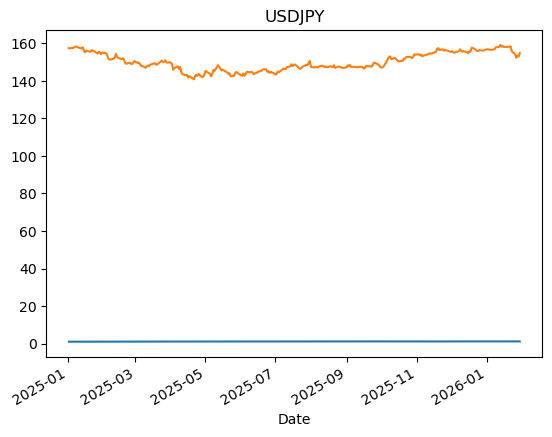

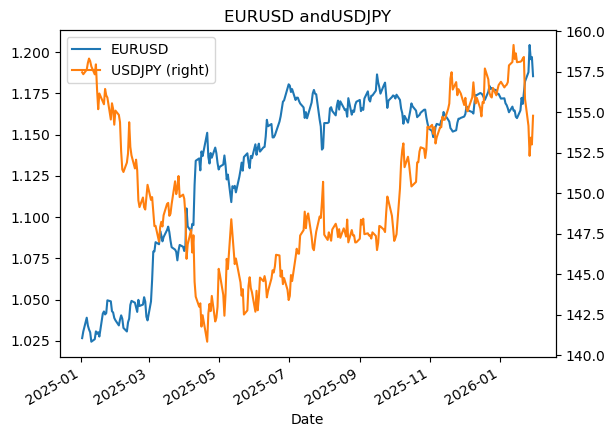

In [3]:
# 2
fx["EURUSD"].plot(title="EURUSD")
fx["USDJPY"].plot(title="USDJPY")
fx[["EURUSD","USDJPY"]].plot(title="EURUSD andUSDJPY", secondary_y=["USDJPY"])

In [4]:
# 3
window_val = 7
eurusd_mean=fx["EURUSD"].rolling(window=window_val).mean()
eurusd_std=fx["EURUSD"].rolling(window=window_val).std()
usdjpy_mean=fx["USDJPY"].rolling(window=window_val).mean()
usdjpy_std=fx["USDJPY"].rolling(window=window_val).std()
print(eurusd_mean.head(10))
print(eurusd_std.head(10))
print(usdjpy_mean.head(10))
print(usdjpy_std.head(10))

Date
2025-01-02         NaN
2025-01-03         NaN
2025-01-06         NaN
2025-01-07         NaN
2025-01-08         NaN
2025-01-09         NaN
2025-01-10    1.030991
2025-01-13    1.030900
2025-01-14    1.030911
2025-01-15    1.029531
Name: EURUSD, dtype: float64
Date
2025-01-02         NaN
2025-01-03         NaN
2025-01-06         NaN
2025-01-07         NaN
2025-01-08         NaN
2025-01-09         NaN
2025-01-10    0.004803
2025-01-13    0.004905
2025-01-14    0.004904
2025-01-15    0.003367
Name: EURUSD, dtype: float64
Date
2025-01-02           NaN
2025-01-03           NaN
2025-01-06           NaN
2025-01-07           NaN
2025-01-08           NaN
2025-01-09           NaN
2025-01-10    157.820571
2025-01-13    157.802286
2025-01-14    157.889214
2025-01-15    157.712929
Name: USDJPY, dtype: float64
Date
2025-01-02         NaN
2025-01-03         NaN
2025-01-06         NaN
2025-01-07         NaN
2025-01-08         NaN
2025-01-09         NaN
2025-01-10    0.363367
2025-01-13    0.386934

In [5]:
# 4
fx["baseline_pred"]=fx["EURUSD"].shift(1)
abs_error=(fx["EURUSD"]-fx["baseline_pred"]).abs()
mae=abs_error.mean()
mae
non_missing=round(fx["baseline_pred"].count())
expected=len(fx)-1
print(f"the number of non‑missing predictions equals the number of rows minus one: {expected==non_missing}")

the number of non‑missing predictions equals the number of rows minus one: True


In [6]:
# 5
report={
    "chosen currency pairs": ["EURUSD" , "USDJPY"],
    "the rolling window size": 7,
    "the mean absolute error from the baseline model": mae,
    "the date range of the dataset": f"{fx.index.min().date()} to {fx.index.max().date()}"
}
print(report)
print(f"the used rolling window size  matches the value in the report: {report['the rolling window size']==window_val}")

{'chosen currency pairs': ['EURUSD', 'USDJPY'], 'the rolling window size': 7, 'the mean absolute error from the baseline model': np.float64(0.004069426523297489), 'the date range of the dataset': '2025-01-02 to 2026-01-30'}
the used rolling window size  matches the value in the report: True
